<a href="https://colab.research.google.com/github/MLuc123/KNN/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
  The difference between regression and classification is that regression predicts a continuous numerical value like a temperature or a price, and a classification predicts a discrete catefory like spam not spam, or an animal species.
2. What is a confusion table? What does it help us understand about a model's performance?
  A confusion table is a N*N matrix used to evaluate a classification model. It can show us exactly where the model is getting confused and breaks down preductions into true positives/negatives and specific types of errors like false positives and negatives.
3. What does the SSE quantify about a particular model?
  The SSE quantifies the total deviation of the predicted values from the actual values. It measures the unexplained variation in the model.
4. What are overfitting and underfitting?
  Overfitting is when the model is too complex and learns the noise in the training data. It will preform poorly on an unseen test data. Underfitting is when the model is too simple to capture the underlying trend. It performs poorly on the training and new data sets.
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
  Splitting the data into training and testing sets provides an unbiased evaluation. If we choose k based on training accuracy we would always choose k=1 but if we choose k based on test set peformance we ensure teh model generalizes to unseen data.
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
  Class labels provide a clear and decisive output that is easy to interpret and is good for immediate automation. However, they treat a boarderline 51% guess as the same certanity as a 99% prediction which discards valuable information about the model's confidence. Reporting a probability distribution captures this uncertanity which allows for a more nuanced decision making. However, it introduces complexity and requires additional logic to translate these raw data values into final actions. This method is better for yes/no tasks where as probabilities are better for essential risk management.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

Data Head:
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654

Dimensions: (2499, 3)
Missing values:
price      0
year       0
mileage    0
dtype: int64


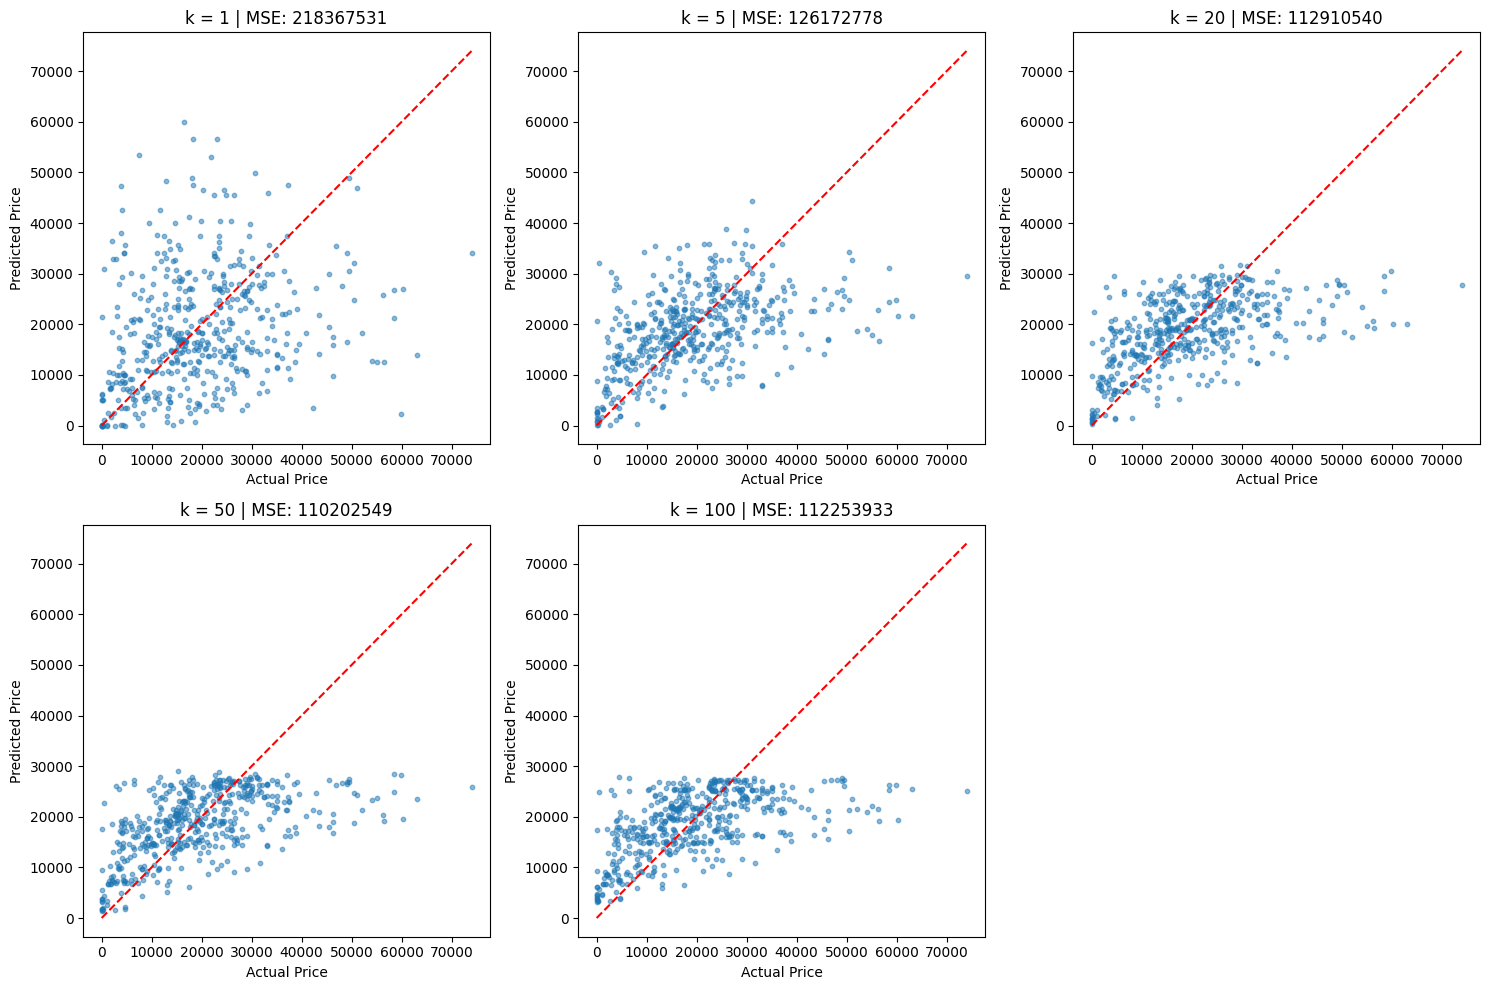

The optimal k value is: 50


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv('USA_cars_datasets.csv')
df = df[['price', 'year', 'mileage']]

print("Data Head:")
print(df.head())
print(f"\nDimensions: {df.shape}")

print(f"Missing values:\n{df.isna().sum()}")
df = df.dropna()

df['year'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
df['mileage'] = (df['mileage'] - df['mileage'].min()) / (df['mileage'].max() - df['mileage'].min())

X = df[['year', 'mileage']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [3, 10, 25, 50, 100, 300]
mse_results = []

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)

    plt.subplot(2, 3, i+1)
    plt.scatter(y_test, y_pred, alpha=0.5, s=10)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'k = {k} | MSE: {mse:.0f}')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()

best_k = k_values[np.argmin(mse_results)]
print(f"The optimal k value is: {best_k}")

# Question 2 Written Explanation

###Low k

The MSE is likely higher or the scatter plot looks very noisy. The predicted points might try to hit every single outlier in the training data, leading to poor generalization on the test data. - This model is overfitting.

###High k

The predictions will clump towards the center (the average price). The scatter plot of predictions will look like a horizontal line, ignoring the actual variations in price. - This model is underfitting and too simple.

###Optimal k

This is the "Goldilocks" zone where the MSE is lowest.

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('zoo.csv')

print("--- Data Inspection ---")
print(df.head())
print(f"\nDimensions of the data: {df.shape}")

print("\n--- Class Compositions ---")
for i in sorted(df['class'].unique()):
    group = df[df['class'] == i]['animal'].tolist()
    print(f"Class {i} (Count: {len(group)}): {group[:10]}...")

print("\n--- Class Sizes ---")
print(df['class'].value_counts().sort_index())

print("\n--- Feature Variation (Standard Deviation) ---")
variation = df.drop(['animal', 'class'], axis=1).std().sort_values(ascending=False)
print(variation)

X = df.drop(['animal', 'class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

k_scores = []
k_range = range(1, 16)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    k_scores.append(score)

optimal_k = k_range[np.argmax(k_scores)]
print(f"\nSelected optimal k: {optimal_k} (Accuracy: {max(k_scores):.2f})")

knn_full = KNeighborsClassifier(n_neighbors=optimal_k)
knn_full.fit(X_train, y_train)
y_pred_full = knn_full.predict(X_test)

print("\n--- Confusion Table (Full Model) ---")
full_conf = pd.crosstab(y_test, y_pred_full, rownames=['Actual'], colnames=['Predicted'])
print(full_conf)

features_red = ['milk', 'aquatic', 'airborne']
X_train_red = X_train[features_red]
X_test_red = X_test[features_red]

knn_red = KNeighborsClassifier(n_neighbors=optimal_k)
knn_red.fit(X_train_red, y_train)
y_pred_red = knn_red.predict(X_test_red)

print("\n--- Confusion Table (Reduced Model) ---")
red_conf = pd.crosstab(y_test, y_pred_red, rownames=['Actual'], colnames=['Predicted'])
print(red_conf)

probs = knn_red.predict_proba(X_test_red.values)
prob_df = pd.DataFrame(probs, columns=knn_red.classes_)

print("\n--- Probability Analysis (Reduced Model) ---")
print("Sum of predicted probabilities for each class across the test set:")
print(prob_df.sum().sort_values())

print("\nExample Probabilities (First 5 Test Animals):")
print(prob_df.head())

--- Data Inspection ---
     animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
2      bass     0         0     1     0         0        1         1        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   

   backbone  breathes  venomous  fins  legs  tail  domestic  catsize  class  
0         1         1         0     0     4     0         0        1      1  
1         1         1         0     0     4     1         0        1      1  
2         1         0         0     1     0     1         0        0      4  
3         1         1         0     0     4     0         0        1      1  
4         1         1         0     0     4     1         0        1      1  

Dimensions of the da

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1. EDA & Hypothesis on Predictors

Class Sizes: The classes are imbalanced. Mammals  and Birds are the largest groups, while classes like Amphibians and Reptiles are much smaller. This imbalance might make it harder for the model to learn the smaller classes. I expect milk to be the best predictor for Class 1 (Mammals) because it is a defining characteristic unique to that group. Similarly, feathers should be a perfect predictor for Class 2 (Birds). Variables like legs or airborne will be less predictive on their own because they are shared across many different classes.

###Selecting k

I selected the optimal k by iterating through values from 1 to 15. For each k, I trained a KNN classifier on the training set and calculated its accuracy on the test set. I then chose the k value that resulted in the highest testing accuracy.

###Full Model Interpretation

The full model is generally very accurate. Mistakes usually occur between classes that share similar structural features but lack a defining 'binary' trait in the dataset. However, Amphibians and Reptiles are often confused because they share features like egg-laying, aquatic tendencies, and lack of hair/feathers.
Occasionally, an animal like a Platypus or a Dolphin might be misclassified if k is too high, as its nearest neighbors might be fish or reptiles.

### Reduced Model Analysis

No, not all classes are represented because the model is underfitting. The underfitting was cause by the fact that there were only 3 binary features (milk, aquatic, airborne). This creates only 8 possible unique combinations to describe the entire animal kingdom.As a result, distinct animals look identical to the model. For example, a Bee and a Crow might have the exact same "profile". The model cannot tell them apart, so it predicts the majority class every time, leaving the other class with a 0% probability.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

Loaded USA_cars_datasets.csv successfully.


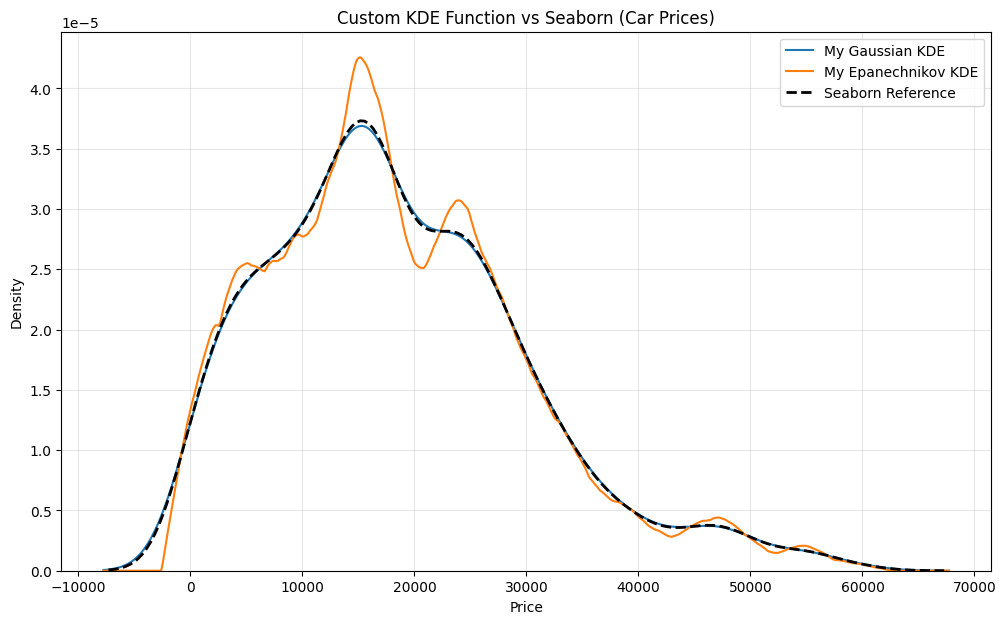

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def my_kde_plot(data, bandwidth=None, kernel='gaussian', ax=None):
    """
    Manual Kernel Density Estimation Function.
    - data: Pandas Series or Numpy Array.
    - bandwidth: Float. Defaults to Silverman's rule if None.
    - kernel: 'gaussian', 'uniform', or 'epanechnikov'.
    """
    data = np.array(data).flatten()
    n = len(data)

    # Bandwidth Selection
    # I implemented Silverman's Rule of Thumb as the default.If h is too small, the plot is "spiky" (overfitting noise). If h is too large, the plot is overly smooth (underfitting/biasing).
    if bandwidth is None:
        std = np.std(data)
        if std == 0:
            bandwidth = 1.0
        else:
            bandwidth = 1.06 * std * (n ** (-1/5))

    # Grid Creation
    # Gaussian kernels have infinite support, so I extend the grid +/- 3 bandwidths  (covering ~99.7% of the mass). For compact kernels (Uniform/Epanechnikov),  this buffer is more than enough since they cut off at +/- 1 bandwidth.
    x_grid = np.linspace(data.min() - (3 * bandwidth),
                         data.max() + (3 * bandwidth), 500)

    # Efficiency & Broadcasting I chose NumPy broadcasting (x_grid[:, np.newaxis] - data) because calculating 500xN distances with a nested for-loop would be significantly slower. Broadcasting handles this in highly optimized C-code under the hood.'u' becomes a matrix of shape (500, n_data)
    u = (x_grid[:, np.newaxis] - data) / bandwidth

    # Kernel Math
    if kernel == 'gaussian':
        k_values = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

    elif kernel == 'uniform':
        k_values = np.where(np.abs(u) <= 1, 0.5, 0)

    elif kernel == 'epanechnikov':
        k_values = np.where(np.abs(u) <= 1, 0.75 * (1 - u**2), 0)

    else:
        raise ValueError("Kernel must be 'gaussian', 'uniform', or 'epanechnikov'")

    density = np.sum(k_values, axis=1) / (n * bandwidth)

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(x_grid, density, label=f'My {kernel.capitalize()} KDE')
    return ax

try:
    df_cars = pd.read_csv('USA_cars_datasets.csv')
    price_data = df_cars[df_cars['price'] < 60000]['price']
    print("Loaded USA_cars_datasets.csv successfully.")
except FileNotFoundError:
    print("Warning: 'USA_cars_datasets.csv' not found. Using random data.")
    price_data = np.concatenate([np.random.normal(20000, 5000, 100), np.random.normal(40000, 8000, 100)])

plt.figure(figsize=(12, 7))
ax = plt.gca()

my_kde_plot(price_data, kernel='gaussian', ax=ax)

my_kde_plot(price_data, kernel='epanechnikov', ax=ax)

sns.kdeplot(price_data, color='black', linewidth=2, linestyle='--', label='Seaborn Reference', ax=ax)

plt.title("Custom KDE Function vs Seaborn (Car Prices)")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

###Question 4

Explanation
Efficiency: Instead of calculating the distance for each point one by one using a loop, I used a method called broadcasting. This allows the computer to calculate all the distances at the same time in one big batch, making the code run much faster.

Bandwidth: I implemented Silverman's rule as the default. If the bandwidth is too small, the plot becomes "spiky" (overfitting the data noise); if it is too large, the plot becomes a flat blob (underfitting the data trend).

###Kernel Math:

Gaussian: Smooth and infinite (never truly reaches zero density).

Uniform: Creates a "blocky" look because it gives equal weight to all points within one bandwidth.

Epanechnikov: A "parabolic" shape that is mathematically optimal for minimizing mean square error, but it cuts off at the edges unlike the Gaussian.